# EDA (Análisis Exploratorio de Datos)

## Introducción

### Contexto del Problema
Analizamos en este apartado los datasets sobre autos de fuentes de energía alternativas y otro específico de autos eléctricos. Esto nos ayudará a tener un entendimiento más profundo de este tipo de vehiculos que son los que la empresa cree conveniente utilizar en reemplazo de los tradicionales, tanto por motivos ecológicos como así por las propuestas e incentivos que se están e irán dando en esta dirección en Nueva York.

### Metodología
Para alcanzar estos objetivos, se realizarán las siguientes etapas de este primer análisis de EDA:
1. **Tipos de datos:** Identificaremos los tipos de datos de cada columna (numérico, categórico, fecha, etc), para luego acomodar aquellos que correspondan.

2. **Nulos:** Detectaremos los valores de celdas que están sin nigún tipo de datos y evaluamos que acción tomar con ellos.

3. **Valores faltantes:** Similar al paso anterior, se refiere a la identificación de celdas que sí contienen datos pero los mismos son nan o no condicen con el el tipo de dato esperado.

4. **Duplicados:** Identificaremos y eliminaremos filas duplicadas en el dataset.

5. **Metadatos/Diccionario de datos:** Crearemos un diccionario de datos que describa cada columna del dataset.

6. **Outliers:** Detectaremos valores atípicos que pueden distorsionar el análisis.

7. **Distribución:** Analizaremos la distribución de los datos para entender su comportamiento.


In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme(palette="muted")

import warnings 
warnings.filterwarnings("ignore")

#from matplotlib.colors import LinearSegmentedColormap

## Alternative Fuel Vehicles

In [195]:
# Empezamos cargando el datset en crudo:
df_alternative_cars = pd.read_csv('../../datasets/Alternative Fuel Vehicles US.csv')
df_alternative_cars.head()

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
0,Sedan/Wagon,NSX,2022.0,Acura,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,21.0,Auto,NaN,SI,3.5L,6.0,NaN,NaN,NaN,AWD
1,Sedan/Wagon,A3,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,32.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,FWD
2,Sedan/Wagon,A3 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,31.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
3,Sedan/Wagon,A4 allroad quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,26.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
4,Sedan/Wagon,A4 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,29.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD


1. **Tipos de datos:**

In [196]:
df_alternative_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Category                            882 non-null    object 
 1   Model                               882 non-null    object 
 2   Model Year                          594 non-null    float64
 3   Manufacturer                        882 non-null    object 
 4   Fuel                                882 non-null    object 
 5   All-Electric Range                  222 non-null    float64
 6   PHEV Total Range                    43 non-null     float64
 7   Alternative Fuel Economy City       169 non-null    float64
 8   Alternative Fuel Economy Highway    169 non-null    float64
 9   Alternative Fuel Economy Combined   262 non-null    float64
 10  Conventional Fuel Economy City      444 non-null    float64
 11  Conventional Fuel Economy Highway   444 non-n

Podemos ver que el dataset tiene 22 columnas, compuestas principalmente de datos del tipo object y float. Algunos como el año de modelo de auto quizás deberíamos transformarlo dado que los años son un valor entero, pero para ello nos va a convenir analizar columna por columna dado que si por ejemplo, hay datos NaN, será más sencillo trabajar con ellos como float.

2. **Nulos:**

In [197]:
df_alternative_cars.isnull().sum()

Category                                0
Model                                   0
Model Year                            288
Manufacturer                            0
Fuel                                    0
All-Electric Range                    660
PHEV Total Range                      839
Alternative Fuel Economy City         713
Alternative Fuel Economy Highway      713
Alternative Fuel Economy Combined     620
Conventional Fuel Economy City        438
Conventional Fuel Economy Highway     438
Conventional Fuel Economy Combined    438
Transmission Type                     242
Transmission Make                     757
Engine Type                           293
Engine Size                           293
Engine Cylinder Count                 433
Number of Passengers                  761
Heavy-Duty Power System               637
Notes                                 703
Drivetrain                            553
dtype: int64

4. **Duplicados**

In [198]:
# Verifico filas duplicadas
duplicated_lines = df_alternative_cars.duplicated().sum()

if duplicated_lines > 0:
    print(f"Hay {duplicated_lines} filas duplicadas.")
else:
    print("No hay filas duplicadas.")

Hay 1 filas duplicadas.


In [199]:
# Eliminar filas duplicadas en caso de que existan
df_alternative_cars = df_alternative_cars.drop_duplicates()
df_alternative_cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Category                            881 non-null    object 
 1   Model                               881 non-null    object 
 2   Model Year                          593 non-null    float64
 3   Manufacturer                        881 non-null    object 
 4   Fuel                                881 non-null    object 
 5   All-Electric Range                  222 non-null    float64
 6   PHEV Total Range                    43 non-null     float64
 7   Alternative Fuel Economy City       169 non-null    float64
 8   Alternative Fuel Economy Highway    169 non-null    float64
 9   Alternative Fuel Economy Combined   262 non-null    float64
 10  Conventional Fuel Economy City      443 non-null    float64
 11  Conventional Fuel Economy Highway   443 non-null  

In [200]:
# Contar las categorías únicas
category_counts = df_alternative_cars['Category'].value_counts()
print(category_counts)

Category
Sedan/Wagon                      282
SUV                              222
Pickup                            79
Transit Bus                       77
Vocational/Cab Chassis            68
Passenger Van/Shuttle Bus         46
Van                               23
School Bus                        21
Street Sweeper                    21
Refuse                            16
Tractor                           15
Step Van                           5
TractorVocational/Cab Chassis      4
Vocational/Cab ChassisVan          1
Vocational/Cab ChassisTractor      1
Name: count, dtype: int64


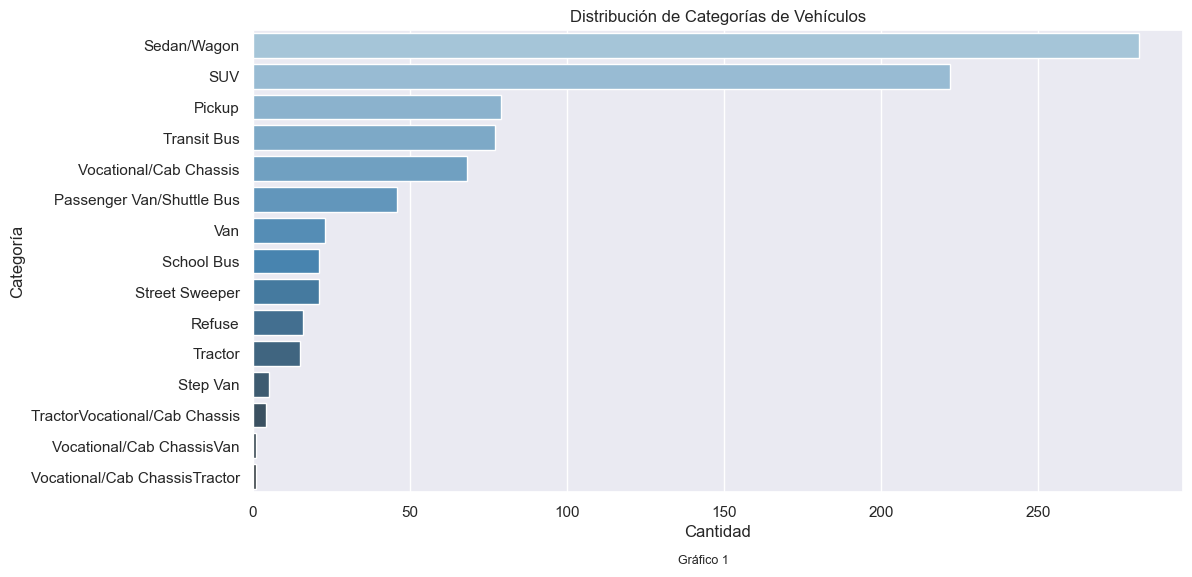

In [201]:
# Visualizar las categorías
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, hue=category_counts.index, dodge=False, palette='Blues_d', legend=False)
plt.title('Distribución de Categorías de Vehículos')
plt.xlabel('Cantidad')
plt.ylabel('Categoría')
plt.figtext(0.5, -0.01, "Gráfico 1", wrap=True, horizontalalignment='center', fontsize=9)
plt.show()

In [202]:
car_models = df_alternative_cars['Model'].unique()
car_models

array(['NSX', 'A3 ', 'A3 quattro', 'A4 allroad quattro', 'A4 quattro',
       'A4 S line quattro', 'A5 Cabriolet quattro', 'A5 Coupe quattro',
       'A5 Sportback quattro', 'A5 Sportback S line quattro',
       'A6 Allroad quattro', 'A6 quattro', 'A7 quattro',
       'A7 TFSI e quattro', 'A8L quattro', 'e-tron GT', 'e-tron quattro',
       'e-tron S (20" wheels)', 'e-tron S (21" or 22" wheels)',
       'e-tron Sportback quattro', 'e-tron S Sportback (20" wheels)',
       'e-tron S Sportback (21" or 22" wheels)', 'Q4 e-tron quattro',
       'Q4 e-tron Sportback quattro', 'Q5 quattro', 'Q5 S line quattro',
       'Q5 Sportback S line quattro', 'Q5 TFSI e quattro', 'Q7 quattro',
       'Q8 quattro', 'RS 6 Avant', 'RS7', 'RS e-tron GT', 'RS Q8', 'S6',
       'S7', 'S8', 'Flying Spur Hybrid', '330e Sedan', '330e xDrive',
       '530e Sedan', '530e xDrive Sedan', '540i Sedan',
       '540i xDrive Sedan', '745e xDrive',
       'i4 eDrive40 Gran Coupe (18" Wheels) ',
       'i4 eDrive40 Gran 

In [203]:
models_year = df_alternative_cars['Model Year'].unique()
models_year

array([2022., 2021.,   nan])

Dado que hay valores nan dentro de la columna, no convertiremos por ahora años a int para poder trabajar con la totalidad de los datos.

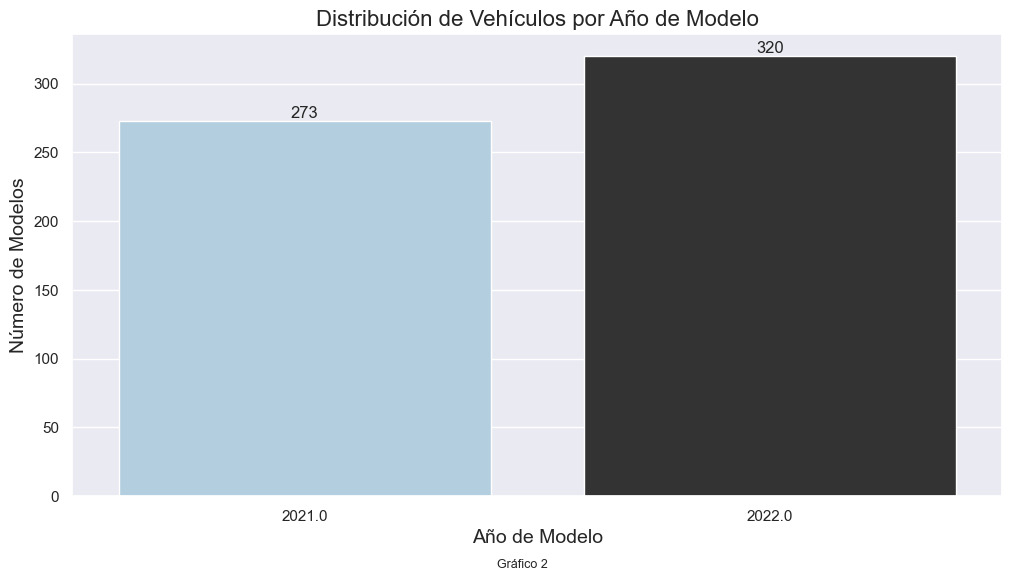

In [204]:
model_year_total = df_alternative_cars['Model Year'].value_counts().sort_index()

# Crear la figura y el eje
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=model_year_total.index, y=model_year_total.values, palette="Blues_d", hue=model_year_total.index, dodge=False)
ax.legend_.remove()  # Eliminar la leyenda

# Añadir títulos y etiquetas en español
ax.set_title('Distribución de Vehículos por Año de Modelo', fontsize=16)
ax.set_xlabel('Año de Modelo', fontsize=14)
ax.set_ylabel('Número de Modelos', fontsize=14)

# Añadir los valores encima de las barras
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=12)

plt.figtext(0.5, -0.01, "Gráfico 2", wrap=True, horizontalalignment='center', fontsize=9)
plt.show()


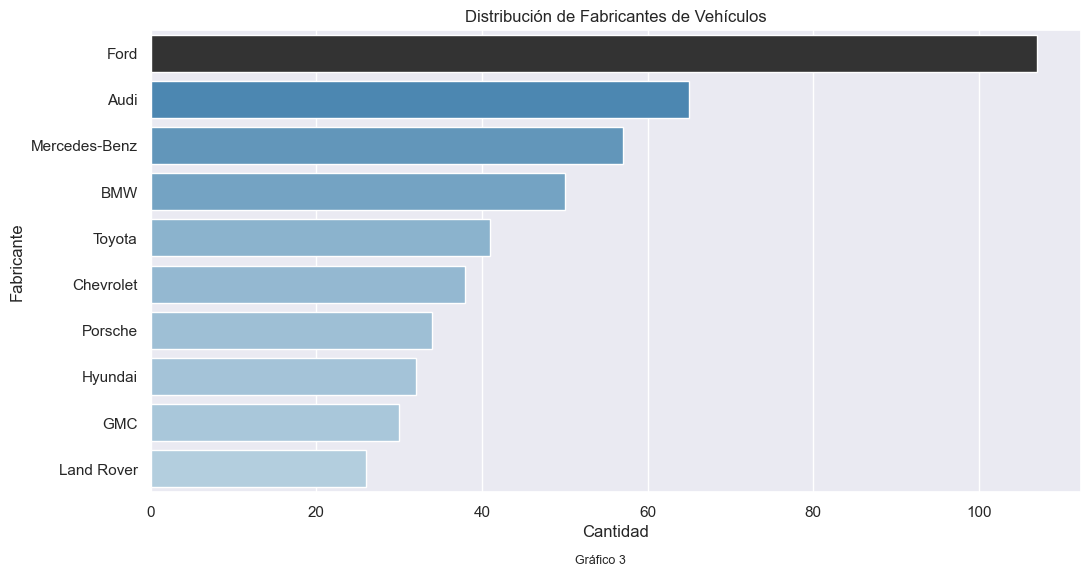

In [205]:
plt.figure(figsize=(12, 6))

# Contamos la cantidad de modelos por marca
manufacturer_count = df_alternative_cars['Manufacturer'].value_counts()

# Selecciono las 10 marcas con más vehículos
top_10_manufacturer = manufacturer_count.nlargest(10)

sns.barplot(x=top_10_manufacturer.values, y=top_10_manufacturer.index, hue=top_10_manufacturer.values, dodge=False, palette='Blues_d', legend=False)
plt.title('Distribución de Fabricantes de Vehículos')
plt.xlabel('Cantidad')
plt.ylabel('Fabricante')
plt.figtext(0.5, -0.01, "Gráfico 3", wrap=True, horizontalalignment='center', fontsize=9)
plt.show()

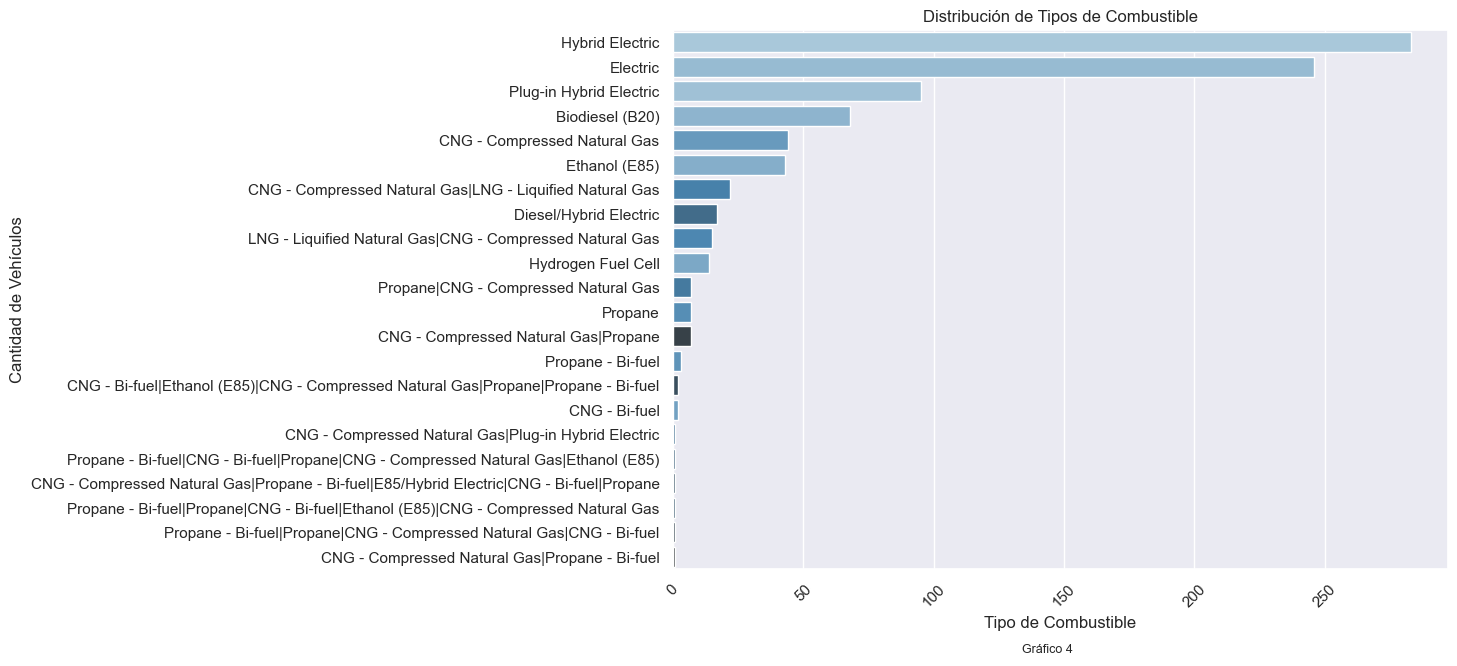

In [206]:
plt.figure(figsize=(10, 7))

# Ordeno los tipos de combustible por la cant de vehículos en orden descendente
order = df_alternative_cars['Fuel'].value_counts().index

# Crear el gráfico de barras
sns.countplot(data=df_alternative_cars, y='Fuel', order=order, palette='Blues_d', hue='Fuel', dodge=False, legend=False)

# Agregar título y etiquetas
plt.title("Distribución de Tipos de Combustible")
plt.xlabel("Tipo de Combustible")
plt.ylabel("Cantidad de Vehículos")
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.figtext(0.5, -0.01, "Gráfico 4", wrap=True, horizontalalignment='center', fontsize=9)
plt.show()


En comparación con el tipo de energía alternativa, los vehículos híbridos (Hybrid Electric)  y los elctricos (Electric) se destacan como los más frecuentes. Lo cual muestra que hay una tendencia de la sociedad hacia el uso de energías no contaminantes por diferentes causas (ecológicas, comodidad, tendencias, precio, etc)

A continuación analizaremos las economias de combutible según si es convencional o alternativa y por el tipo de vía. Para ello primero investigamos el significado de economía de combustible y en que se diferencia de la autonomía de un vehiculo dado que más adelante manejaremos ese concepto en el siguiente dataset.  

**Economía de Combustible:** Mide la eficiencia con la que un vehículo utiliza el combustible para recorrer una distancia. Se expresa en millas por galón (mpg) o litros por cada 100 kilómetros (L/100 km). Ej: Un auto con una economía de combustible de 30 mpg puede recorrer 30 millas con un galón de gasolina.

**Autonomía:** Mide la distancia total que un vehículo puede recorrer con una carga completa de combustible o batería. Se expresa en millas o kilómetros. Ej: Un coche con una autonomía de 300 millas puede viajar 300 millas antes de necesitar recarga.

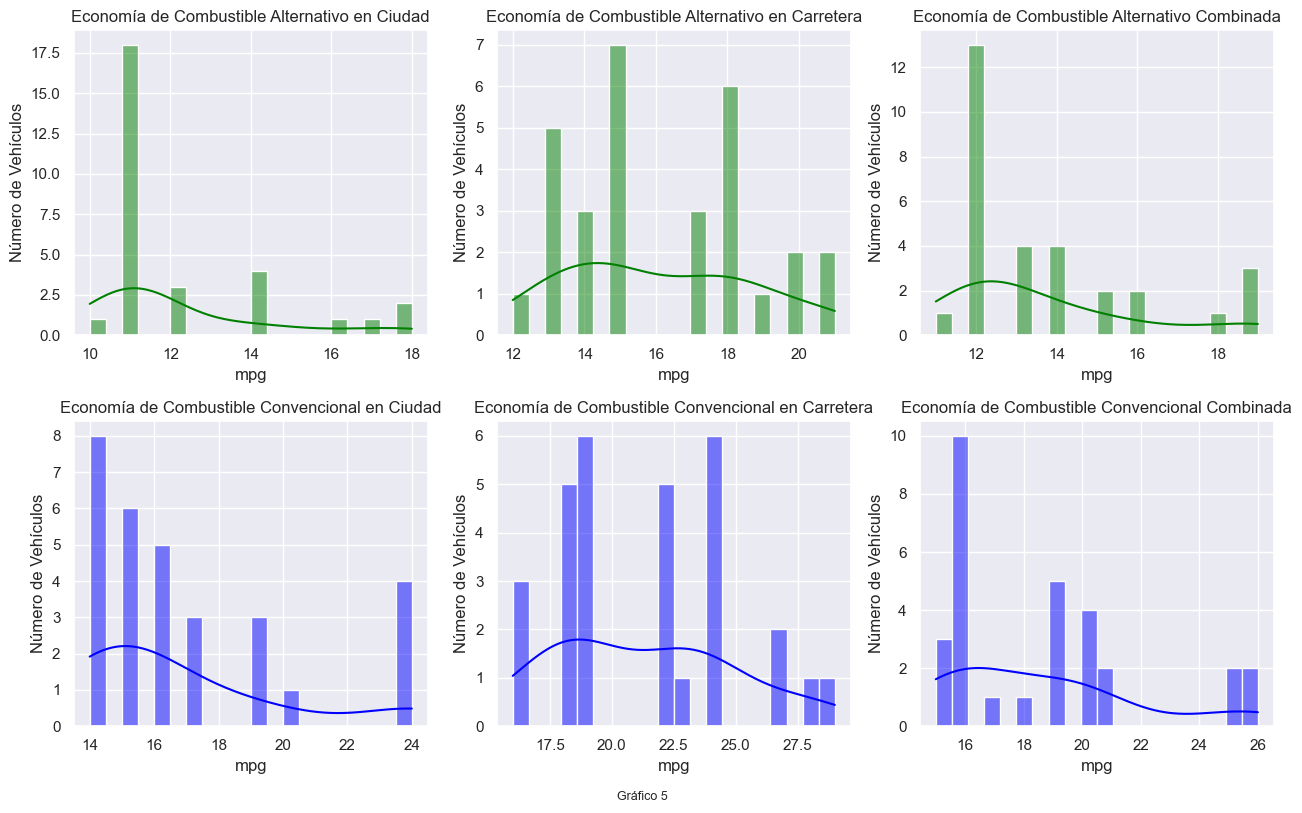

In [207]:
# Elimino valores nulos dado que tal como pudimos analizar eran muchos y pueden alterar la lectura
df_clean = df_alternative_cars.dropna(subset=[
    'Alternative Fuel Economy City', 'Alternative Fuel Economy Highway', 'Alternative Fuel Economy Combined',
    'Conventional Fuel Economy City', 'Conventional Fuel Economy Highway', 'Conventional Fuel Economy Combined'
])

# Creo subplots
fig, axes = plt.subplots(2, 3, figsize=(13, 8))

# Histograma para economía de combustible en ciudad (alternativo)
sns.histplot(df_clean['Alternative Fuel Economy City'], bins=20, kde=True, color='green', ax=axes[0, 0])
axes[0, 0].set_title("Economía de Combustible Alternativo en Ciudad")
axes[0, 0].set_xlabel("mpg")
axes[0, 0].set_ylabel("Número de Vehículos")

# Histograma para economía de combustible en ciudad (convencional)
sns.histplot(df_clean['Conventional Fuel Economy City'], bins=20, kde=True, color='blue', ax=axes[1, 0])
axes[1, 0].set_title("Economía de Combustible Convencional en Ciudad")
axes[1, 0].set_xlabel("mpg")
axes[1, 0].set_ylabel("Número de Vehículos")

# Histograma para economía de combustible en carretera (alternativo)
sns.histplot(df_clean['Alternative Fuel Economy Highway'], bins=20, kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title("Economía de Combustible Alternativo en Carretera")
axes[0, 1].set_xlabel("mpg")
axes[0, 1].set_ylabel("Número de Vehículos")

# Histograma para economía de combustible en carretera (convencional)
sns.histplot(df_clean['Conventional Fuel Economy Highway'], bins=20, kde=True, color='blue', ax=axes[1, 1])
axes[1, 1].set_title("Economía de Combustible Convencional en Carretera")
axes[1, 1].set_xlabel("mpg")
axes[1, 1].set_ylabel("Número de Vehículos")

# Histograma para economía de combustible combinada (alternativo)
sns.histplot(df_clean['Alternative Fuel Economy Combined'], bins=20, kde=True, color='green', ax=axes[0, 2])
axes[0, 2].set_title("Economía de Combustible Alternativo Combinada")
axes[0, 2].set_xlabel("mpg")
axes[0, 2].set_ylabel("Número de Vehículos")

# Histograma para economía de combustible combinada (convencional)
sns.histplot(df_clean['Conventional Fuel Economy Combined'], bins=20, kde=True, color='blue', ax=axes[1, 2])
axes[1, 2].set_title("Economía de Combustible Convencional Combinada")
axes[1, 2].set_xlabel("mpg")
axes[1, 2].set_ylabel("Número de Vehículos")

plt.figtext(0.5, -0.01, "Gráfico 5", wrap=True, horizontalalignment='center', fontsize=9)
plt.tight_layout()
plt.show()


En el gráfico mostramos seis histogramas que comparan la economía de combustible (en millas por galón, mpg) de vehículos con combustible alternativo y convencional en diferentes condiciones de manejo: ciudad, carretera y combinada.

Economía de Combustible en Ciudad:
Alternativo: La mayoría de los vehículos tienen una economía de combustible entre 15 y 20 mpg.
Convencional: La mayoría de los vehículos tienen una economía de combustible entre 10 y 20 mpg, con una mayor concentración alrededor de 15 mpg.
**Ambos tipos de vehículos muestran una distribución similar en la economía de combustible en ciudad, levemente favorable para alterntivos.**
Economía de Combustible en Carretera:
Alternativo: La mayoría de los vehículos tienen una economía de combustible entre 20 y 40 mpg.
Convencional: La mayoría de los vehículos tienen una economía de combustible entre 20 y 30 mpg.
**Mejor Rendimiento en Carretera: Los vehículos con combustible alternativo** 
Economía de Combustible Combinada:
Alternativo: La mayoría de los vehículos tienen una economía de combustible entre 20 y 30 mpg.
Convencional: La mayoría de los vehículos tienen una economía de combustible entre 15 y 25 mpg.
**Mejor Rendimiento Combinado: Los vehículos con combustible alternativo** 


## Electric Car Data

En esta sección nos encontramos con dos datasets, así que procedemos a cargarlos y analizarlos brevemente para notar diferencias y similitudes entre sí.

In [208]:
df_electric_car_data_norm = pd.read_csv('../../datasets/ElectricCarData_Norm.csv')
df_electric_car_data_norm.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [209]:
df_electric_car_data_clean = pd.read_csv('../../datasets/ElectricCarData_Clean.csv')
df_electric_car_data_clean.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


A primera vista notamos que son muy similares, así que analizamos un poco el detalle del tipo de objetos, cantidad, etc

1. **Tipo de Datos**

In [210]:
df_electric_car_data_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


In [211]:
df_electric_car_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


Efectivamente se trata de datasets con el mismo contenido pero esta última con los datos acorde al tipo de dato que contienen. Así que procedemos a trabajar con este último dataset por la simpleza de la información. Y si bien casi todas las columnas tienen el tipo de dato acorde a su contenido, en el caso de 'FastCharge_KmH' notamos que debería ser del tipo numérico, sin embargo, figura como object.

In [212]:
df_electric_car_data_clean['FastCharge_KmH'].unique()

array(['940', '250', '620', '560', '190', '220', '420', '650', '540',
       '440', '230', '380', '210', '590', '780', '170', '260', '930',
       '850', '910', '490', '470', '270', '450', '350', '710', '240',
       '390', '570', '610', '340', '730', '920', '-', '550', '900', '520',
       '430', '890', '410', '770', '460', '360', '810', '480', '290',
       '330', '740', '510', '320', '500'], dtype=object)

Como podemos observar, figura un dato '-', razón por la cual no figuraba como numérico. Así que procedemos a modificar dicho valor.

2. **Valores faltantes:**

In [213]:
df_electric_car_data_clean['FastCharge_KmH'] = df_electric_car_data_clean['FastCharge_KmH'].replace('-', np.nan)

# Convertir la columna a tipo numérico
df_electric_car_data_clean['FastCharge_KmH'] = pd.to_numeric(df_electric_car_data_clean['FastCharge_KmH'], errors='coerce')

# Calcular la moda de los valores numéricos, ignorando NaN
mode_value = df_electric_car_data_clean['FastCharge_KmH'].mode()[0]

# Reemplazar los NaN con la moda calculada
df_electric_car_data_clean['FastCharge_KmH'] = df_electric_car_data_clean['FastCharge_KmH'].fillna(mode_value)

# Verificar los valores únicos después de la conversión
df_electric_car_data_clean['FastCharge_KmH'].unique()

array([940., 250., 620., 560., 190., 220., 420., 650., 540., 440., 230.,
       380., 210., 590., 780., 170., 260., 930., 850., 910., 490., 470.,
       270., 450., 350., 710., 240., 390., 570., 610., 340., 730., 920.,
       550., 900., 520., 430., 890., 410., 770., 460., 360., 810., 480.,
       290., 330., 740., 510., 320., 500.])

Una vez reemplazado los valores ausentes por el pormedio de los otros valores pasamos el tipo de dato a entero.

In [214]:
df_electric_car_data_clean.FastCharge_KmH = df_electric_car_data_clean.FastCharge_KmH.astype('int64')
df_electric_car_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


3. **Nulos**

In [215]:
df_electric_car_data_clean.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

En este caso notamos que no hay valores nulos registrados.

4. **Duplicados:**

In [216]:
# Verifico filas duplicadas
duplicated_lines2 = df_electric_car_data_clean.duplicated().sum()

if duplicated_lines2 > 0:
    print(f"Hay {duplicated_lines2} filas duplicadas.")
else:
    print("No hay filas duplicadas.")

No hay filas duplicadas.


**Outliers:**
Un outlier es un valor en un conjunto de datos que se desvia significativamente de los demás valores. Pueden surgir debido a errores de medición, variaciones naturales en los datos o eventos extraordinarios. Es importante identificar estos valores porque pueden influir en el análisis y gráficos.

A) Precio

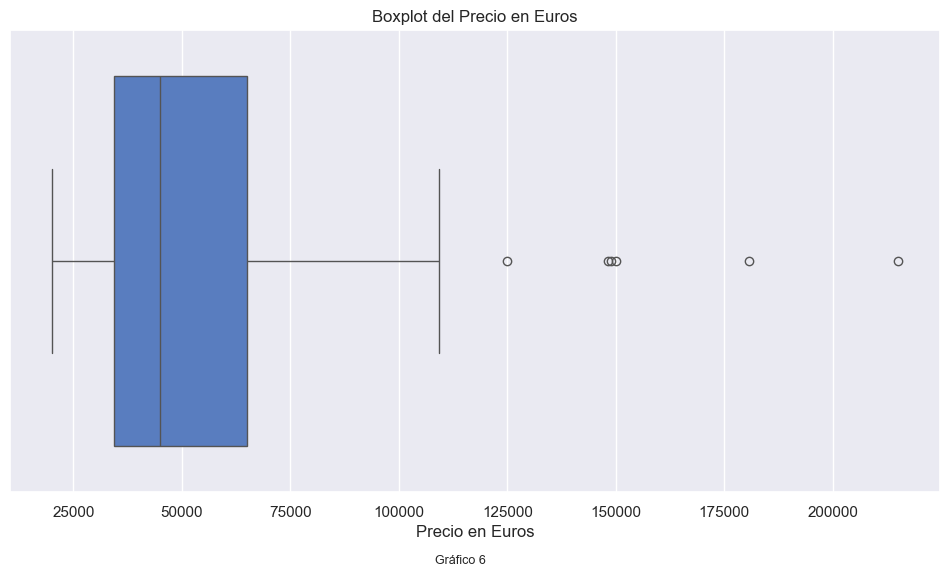

In [217]:
# Crear un boxplot para la columna 'PriceEuro'
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_electric_car_data_clean['PriceEuro'])
plt.title('Boxplot del Precio en Euros')
plt.xlabel('Precio en Euros')
plt.figtext(0.5, -0.01, "Gráfico 6", wrap=True, horizontalalignment='center', fontsize=9)
plt.show()


El boxplot muestra la distribución de los precios de los coches eléctricos en euros. La mayoría de los precios se encuentran dentro del rango intercuartílico (IQR), que está representado por la caja azul. La línea dentro de la caja indica la mediana del precio. Se identifican algunos outliers, que se encuentran significativamente por encima del rango típico de precios. Dado que existen coches eléctricos de lujo en el mercado, es razonable asumir que estos outliers representan vehículos de alta gama.

B) Autonomía en kilómetros

In [218]:
# Calculo el IQR
Q1 = df_electric_car_data_clean['Range_Km'].quantile(0.25)
Q3 = df_electric_car_data_clean['Range_Km'].quantile(0.75)
IQR = Q3 - Q1

# Defino los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifico los outliers
outliers = df_electric_car_data_clean[(df_electric_car_data_clean['Range_Km'] < lower_bound) | (df_electric_car_data_clean['Range_Km'] > upper_bound)]
print(f'Número de outliers en la columna Range_Km: {outliers.shape[0]}')
print(outliers)


Número de outliers en la columna Range_Km: 2
     Brand                 Model  AccelSec  TopSpeed_KmH  Range_Km  \
33  Tesla   Cybertruck Tri Motor       3.0           210       750   
51  Tesla              Roadster        2.1           410       970   

    Efficiency_WhKm  FastCharge_KmH RapidCharge PowerTrain    PlugType  \
33              267             710         Yes        AWD  Type 2 CCS   
51              206             920         Yes        AWD  Type 2 CCS   

   BodyStyle Segment  Seats  PriceEuro  
33    Pickup       N      6      75000  
51    Cabrio       S      4     215000  


En este caso hay 2 outliers,probablemente no sean errores de datos sino que se trata de vehículos de alta gama, Tesla Cybertruck Tri Motor y el Tesla Roadster, que al investigar notamos que son conocidos más alla de su diseño particular y tecnología avanzada, por el rendimiento de sus baterías que les permite recorrer largas distancias.

7. **Distribución:** Analizaremos la distribución de los datos para entender su comportamiento.

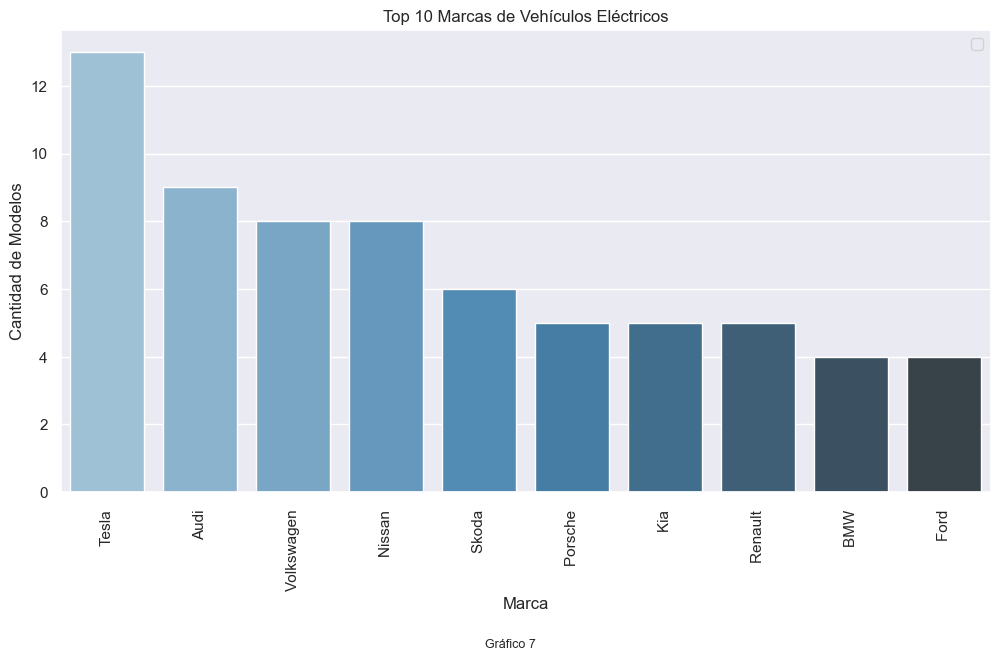

In [219]:
plt.figure(figsize=(12, 6))

# Contamos la cantidad de modelos por marca
brand_count = df_electric_car_data_clean['Brand'].value_counts()

# Selecciono las 10 marcas con más vehículos
top_10_brands = brand_count.nlargest(10)

# Crear el gráfico de barras con una paleta de colores más agradable
sns.barplot(x=top_10_brands.index, y=top_10_brands.values, palette='Blues_d', hue=top_10_brands.index, dodge=False)

# Agregar título y etiquetas
plt.title("Top 10 Marcas de Vehículos Eléctricos")
plt.xlabel("Marca")
plt.ylabel("Cantidad de Modelos")
plt.xticks(rotation=90)
plt.legend([])
plt.figtext(0.5, -0.15, "Gráfico 7", wrap=True, horizontalalignment='center', fontsize=9)

plt.show()


Como se nota en el gráfico Tesla es quien más cantidad de modelos tiene en el mercado.

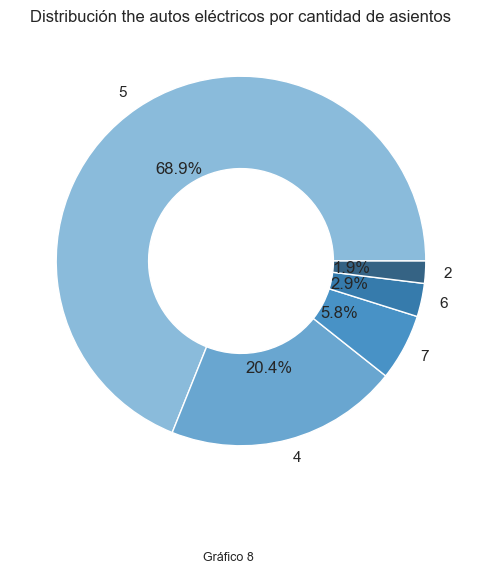

In [220]:
# Contar la cantidad de vehículos por cantidad de asientos
seat_count = df_electric_car_data_clean['Seats'].value_counts()

# Crear el gráfico tipo donut
plt.figure(figsize=(10, 6))
plt.pie(seat_count, labels=seat_count.index, autopct='%1.1f%%', colors=sns.color_palette('Blues_d'), wedgeprops=dict(width=0.5))

# Agregar título
plt.title("Distribución the autos eléctricos por cantidad de asientos")
plt.figtext(0.5, -0.005, "Gráfico 8", wrap=True, horizontalalignment='center', fontsize=9)
# Mostrar el gráfico
plt.show()


Como se puede ver en este gráfico, la mayoría de modelos de autos eléctricos diseñados es de 5 personas, probablemente asociado a una familia tipo, lo cual sería interesante analizar si es el modo más frecuente de viajar o no.

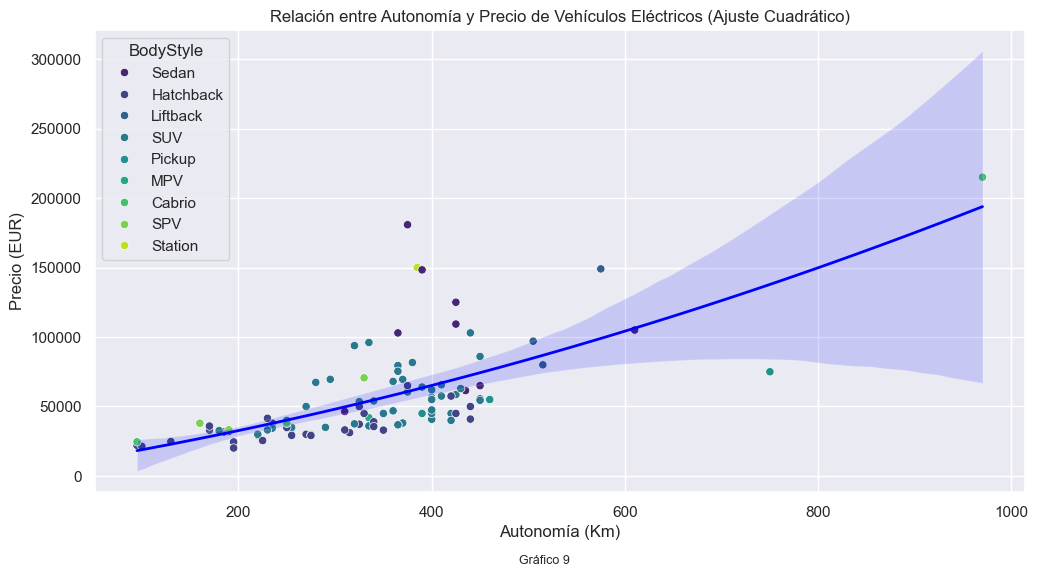

In [221]:
plt.figure(figsize=(12, 6))

# Crear el gráfico de dispersión
sns.scatterplot(data=df_electric_car_data_clean, x='Range_Km', y='PriceEuro', hue='BodyStyle', palette='viridis')

# Agregar la línea de regresión cuadrática
sns.regplot(data=df_electric_car_data_clean, x='Range_Km', y='PriceEuro', scatter=False, color='blue', line_kws={"linewidth": 2}, order=2)

# Agregar título y etiquetas
plt.title("Relación entre Autonomía y Precio de Vehículos Eléctricos (Ajuste Cuadrático)")
plt.xlabel("Autonomía (Km)")
plt.ylabel("Precio (EUR)")
plt.figtext(0.5, -0.01, "Gráfico 9", wrap=True, horizontalalignment='center', fontsize=9)

# Mostrar el gráfico
plt.show()

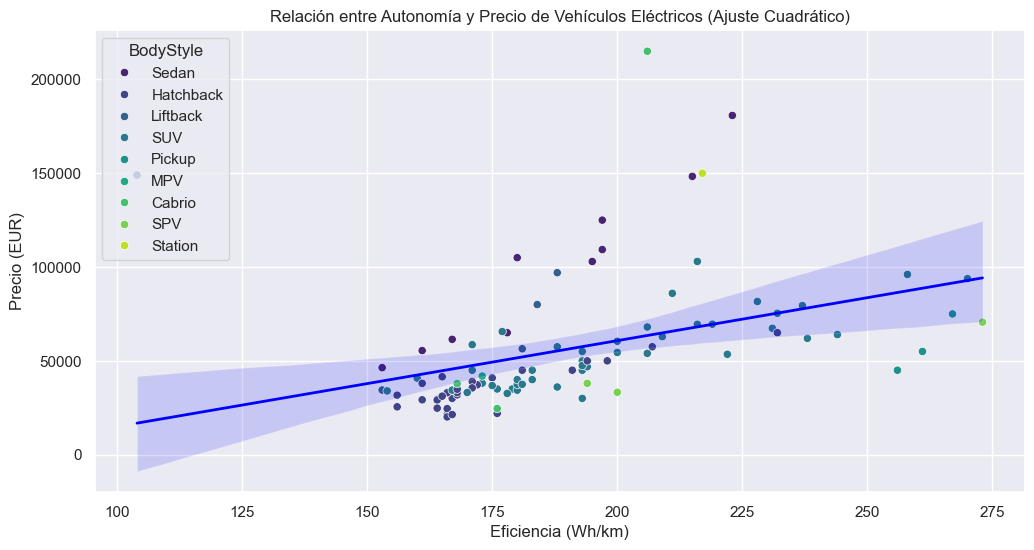

In [222]:
plt.figure(figsize=(12, 6))

# Crear el gráfico de dispersión
sns.scatterplot(data=df_electric_car_data_clean, x='Efficiency_WhKm', y='PriceEuro', hue='BodyStyle', palette='viridis')

# Agregar la línea de regresión cuadrática
sns.regplot(data=df_electric_car_data_clean, x='Efficiency_WhKm', y='PriceEuro', scatter=False, color='blue', line_kws={"linewidth": 2})

# Agregar título y etiquetas
plt.title("Relación entre Autonomía y Precio de Vehículos Eléctricos (Ajuste Cuadrático)")
plt.xlabel("Eficiencia (Wh/km)")
plt.ylabel("Precio (EUR)")
#plt.figtext(0.5, -0.01, "Gráfico 9", wrap=True, horizontalalignment='center', fontsize=9)

# Mostrar el gráfico
plt.show()

Por lo que se nota existe una tendencia positiva, donde a mayor autonomía y mayor eficiencia del vehículo, mayor su precio . Probablemente tenga que ver no solo con la eficiencia de la bateria sino también con su capacidad, lo cual explica el mayor costo. Tambien se ovbserva que, la mayoría de los vehículos se agrupan en el rango de precios entre 10.000 y 100.000 EUR, con autonomías que varían ampliamente dentro de este rango de precios y con una clara presencia de autos tipo Hatchback y SUV. También vemos como particularidad que el auto de mayor costo y autonomía se trata de un auto convertible, posiblemente un deportivo. 

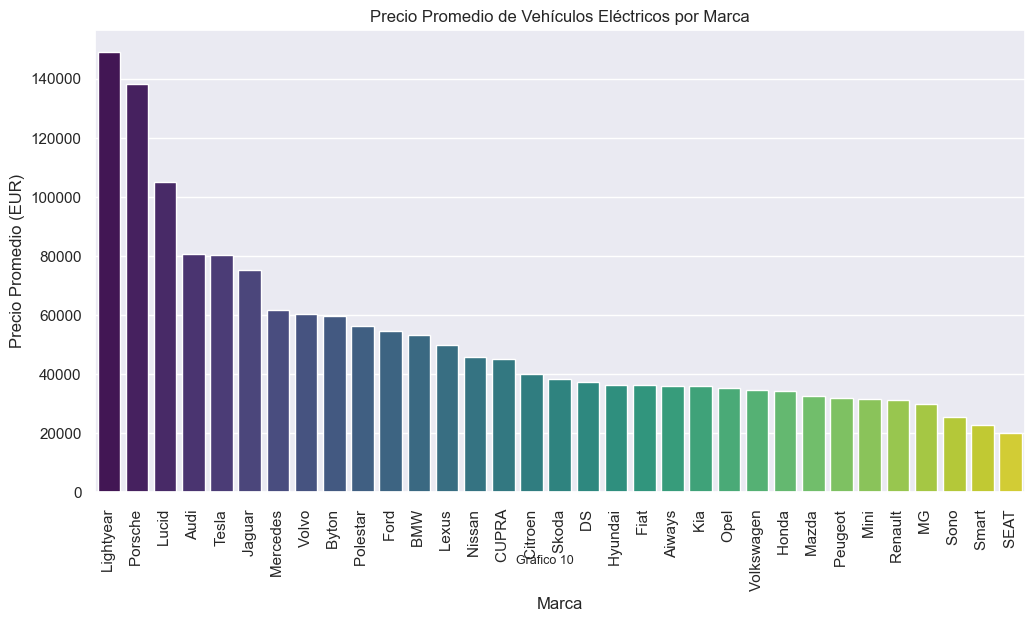

In [223]:
plt.figure(figsize=(12, 6))

# Calcular el precio promedio por marca
average_price_by_brand = df_electric_car_data_clean.groupby('Brand')['PriceEuro'].mean().sort_values(ascending=False)

# Crear el gráfico de barras
sns.barplot(x=average_price_by_brand.index, y=average_price_by_brand.values, hue=average_price_by_brand.index, palette='viridis', dodge=False, legend=False)

# Agregar título y etiquetas
plt.title("Precio Promedio de Vehículos Eléctricos por Marca")
plt.xlabel("Marca")
plt.ylabel("Precio Promedio (EUR)")
plt.xticks(rotation=90)

plt.figtext(0.5, -0.01, "Gráfico 10", wrap=True, horizontalalignment='center', fontsize=9)

plt.show()


En este caso podemos ver como el promedio del precio por marca varia desde aquellas marcas de lujo con un precio promedio por arriba de los 100.000 euros a marcas con modelos con precios en promedio más acequibles.s

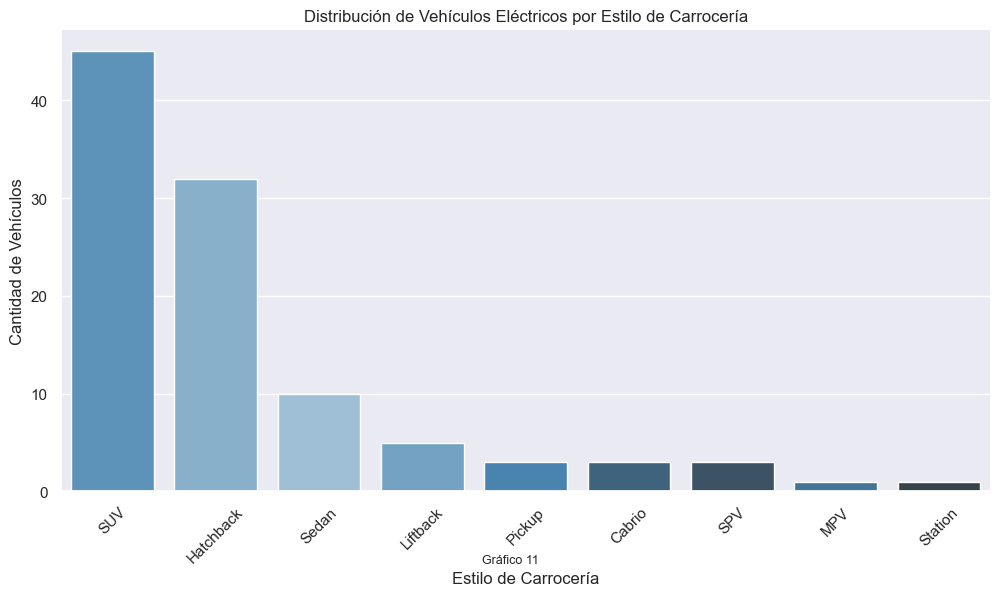

In [224]:
plt.figure(figsize=(12, 6))

# Ordeno los estilos de carrocería por la cantidad de vehículos en orden descendente
order = df_electric_car_data_clean['BodyStyle'].value_counts().index

# Cro el gráfico de barras
sns.countplot(data=df_electric_car_data_clean, x='BodyStyle', hue='BodyStyle', order=order, palette='Blues_d', dodge=False)

# Agrego título y etiquetas
plt.title("Distribución de Vehículos Eléctricos por Estilo de Carrocería")
plt.xlabel("Estilo de Carrocería")
plt.ylabel("Cantidad de Vehículos")
plt.xticks(rotation=45)
plt.figtext(0.5, -0.01, "Gráfico 11", wrap=True, horizontalalignment='center', fontsize=9)
plt.show()

Como podemos obvservar, en este caso, por el tipo de Auto los más frecuentes son los SUV y Hatchback, lo cual no sorprende si uno mira con atencion el grafico de distrbución por autonomía y precio. 